# Problem Statement
    The prediction task is to determine whether a person makes over 50K a year. Explain the
    performance of the model using accuracy, AUROC curve and confusion matrix. Feel free
    to add any other metric you see fit.
    Perform a segmentation study on the dataset to display useful information using any
    visualization library.

# Prepare notebook

In [203]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score 

# Data Preparation

In [204]:
%ls -l data/au_train.csv

-rwxrwxrwx 1 1000 1000 3844216 Sep 27 15:03 data/au_train.csv*


In [205]:
from pandas import read_csv
filename1 = 'data/au_train.csv'
filename2 = 'data/au_test.csv'

train_set = read_csv(filename1)
test_set  = read_csv(filename2) 
train_set.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [206]:
train_set.info()
print ()
print ('train size:', train_set.shape)
print ('test size:', test_set.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
class             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

train size: (32561, 15)
test size: (16281, 15)


In [207]:
print(train_set.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64


In [208]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education-num     16281 non-null int64
marital-status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital-gain      16281 non-null int64
capital-loss      16281 non-null int64
hours-per-week    16281 non-null int64
native-country    16281 non-null object
class             16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [209]:
test_set.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


 Data consists of 8 categorical variables, one target which is also non numeric and 6 numerical features.There are no missing values in the train data set. However "?" are present in test set.

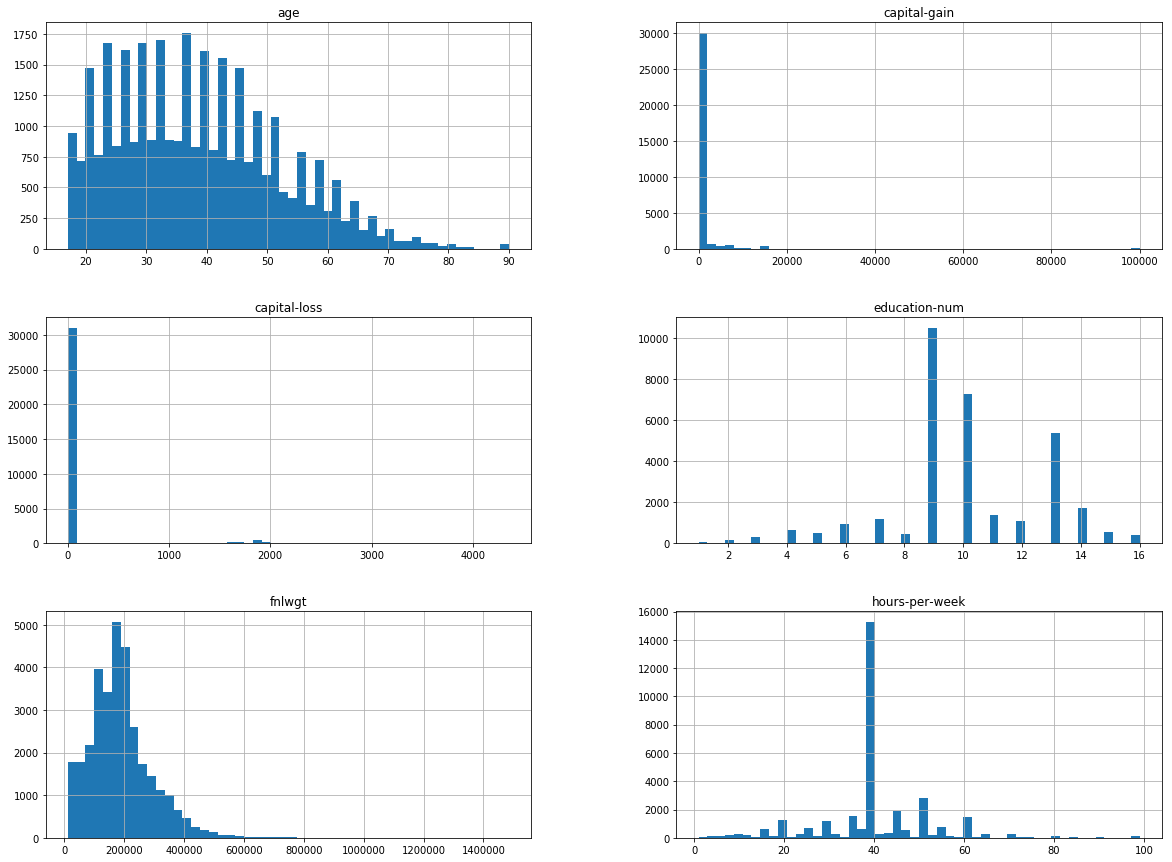

In [210]:
%matplotlib inline
import matplotlib.pyplot as plt
train_set.hist(bins=50, figsize=(20,15))
plt.show()

In [211]:
print ('train size:', train_set.shape)
print ('test size:', test_set.shape)

train size: (32561, 15)
test size: (16281, 15)


## Data Exploration

In [212]:
# transform column names for easy manipulation

train_set=train_set.rename(columns={'education-num':'education_num', 'marital-status': 'marital_status',
                          'capital-gain':'capital_gain', 'capital-loss':'capital_loss',
                  'hours-per-week':'hrs_per_week', 'native-country':'native_country'})


In [213]:
test_set= test_set.rename(columns={'education-num':'education_num', 'marital-status': 'marital_status',
                          'capital-gain':'capital_gain', 'capital-loss':'capital_loss',
                  'hours-per-week':'hrs_per_week', 'native-country':'native_country'})

In [214]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [215]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country',
       'class'],
      dtype='object')

##  Check Correlation among numeric variables

In [216]:
# unique values of target variable
train_set['class'].unique()


array([' <=50K', ' >50K'], dtype=object)

In [217]:
# change class into numeric type before checking correlations

train_set['class'] = train_set["class"].map({ ' <=50K': 0, ' >50K': 1})

In [218]:
train_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


In [219]:
test_set['class'] = test_set["class"].map({ ' <=50K.': 0, ' >50K.': 1})
test_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0


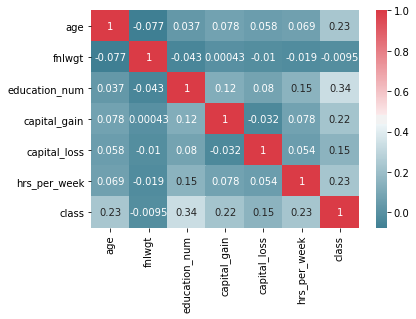

In [220]:
corr = train_set[train_set.columns].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot = True)

This correlation plot shows that education_num is highly correlated with class. Similarly, capital_gain, age and hours_per_week have pretty high correlation with class.

In [221]:
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hrs_per_week,class
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [222]:
test_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hrs_per_week,class
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236,0.236226
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332,0.424776
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000,1.000000


In [223]:
train_set.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [224]:
test_set.native_country.value_counts()

 United-States                 14662
 Mexico                          308
 ?                               274
 Philippines                      97
 Puerto-Rico                      70
 Germany                          69
 Canada                           61
 India                            51
 El-Salvador                      49
 China                            47
 Cuba                             43
 England                          37
 South                            35
 Dominican-Republic               33
 Italy                            32
 Haiti                            31
 Portugal                         30
 Japan                            30
 Poland                           27
 Columbia                         26
 Jamaica                          25
 Guatemala                        24
 Greece                           20
 Vietnam                          19
 Ecuador                          17
 Iran                             16
 Nicaragua                        15
 

These plot show feature Native_country in test set does not have Holand_Netherlands category which is present in Train set

## Data Cleaning
    
    Feature Native_country in test set does not have Holand_Netherlands category which is present in Train set
    
    Three columns in the Datasets have '?' character. This is being taken care by first replacing this string with nan which in turn is being replaced by mode value of each feature in the data.

In [225]:
# To find how many rows there are where native_country is Holand-Netherlands
# (this is done in order to avoid any discrepancy between train and test set with respect to number of columns)

print(train_set.loc[train_set['native_country']==' Holand-Netherlands'])

       age workclass  fnlwgt      education  education_num  marital_status  \
19609   32   Private   27882   Some-college             10   Never-married   

               occupation     relationship    race      sex  capital_gain  \
19609   Machine-op-inspct   Other-relative   White   Female             0   

       capital_loss  hrs_per_week       native_country  class  
19609          2205            40   Holand-Netherlands      0  


So there is only one row in the train set where native_country is Holand- Netherlands. This can be deleted since this category isnot present in test set. This will help even out number of columns while creating dummies

In [226]:
train_set= train_set.drop([19609], axis =0)
#print(train_set.loc[train_set['native-country']==' Holand-Netherlands'])
train_set.shape

(32560, 15)

In [227]:
datasets=[train_set, test_set] 

cats=["workclass",'occupation', "native_country"] # separate columns with '?' string

for data in datasets:
    for i in data.columns:
        data[i].replace(' ?', np.nan, inplace=True) # replace '?' with nan

p = test_set.filter(["workclass",'occupation', "native_country"]).mode() 

test_set[cats]=test_set[cats].fillna(value=p.iloc[0]) # replace nan with mode of each column



In [228]:
l = train_set.filter(['workclass','occupation', 'native_country']).mode()
train_set[cats]=train_set[cats].fillna(value=p.iloc[0])

In [229]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


# Data preparation for machine learning

## Feature Transformation and Feature Engineering

Since the native_country in the data is mostly  United States, following transformation is being done

In [230]:
train_set['native_country']= train_set['native_country'].replace(to_replace=[' Philippines',' Puerto-Rico',' Canada',' Germany',' India',' Cambodia',' Ecuador',
                                                                   ' England', ' Jamaica',' China',' Hong',' El-Salvador',' Cuba',' Dominican-Republic',' Vietnam',
                                                                  ' South',' Japan',' Italy',' Haiti',' Poland',' Portugal',' Columbia',' Iran',' Taiwan',' Guatemala',
                                                                  ' Nicaragua',' Peru',' Greece',' France',' Ireland',' Trinadad&Tobago',' Scotland',' Laos',' Thailand',
                                                                  ' Hungary',' Yugoslavia',' Outlying-US(Guam-USVI-etc)',' Honduras'], value='Others')

test_set['native_country']= test_set['native_country'].replace(to_replace=[' Philippines',' Puerto-Rico',' Canada',' Germany',' India',' Cambodia',' Ecuador',
                                                                   ' England', ' Jamaica',' China',' Hong',' El-Salvador',' Cuba',' Dominican-Republic',' Vietnam',
                                                                  ' South',' Japan',' Italy',' Haiti',' Poland',' Portugal',' Columbia',' Iran',' Taiwan',' Guatemala',
                                                                  ' Nicaragua',' Peru',' Greece',' France',' Ireland',' Trinadad&Tobago',' Scotland',' Laos',' Thailand',
                                                                  ' Hungary',' Yugoslavia',' Outlying-US(Guam-USVI-etc)',' Honduras'], value='Others')



In [231]:
print(train_set['native_country'].unique())
print(test_set['native_country'].unique())

[' United-States' 'Others' ' Mexico']
[' United-States' 'Others' ' Mexico']


In order to reduce some of the categories of categorical features, some of the categories can be combined without changing their representation

In [232]:
train_set.workclass.value_counts()

 Private             24531
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [233]:
# reducing 'workclass' categories

train_set['workclass']=train_set['workclass'].replace([' Self-emp-not-inc',' Self-emp-inc'], 'self_emp') 
train_set['workclass']=train_set['workclass'].replace([ ' Local-gov', ' State-gov', ' Federal-gov'],'gov')
train_set['workclass']=train_set['workclass'].replace([' Without-pay',' Never-worked'],'Other')

test_set['workclass']=test_set['workclass'].replace([' Self-emp-not-inc',' Self-emp-inc'], 'self_emp') 
test_set['workclass']=test_set['workclass'].replace([ ' Local-gov', ' State-gov', ' Federal-gov'],'gov')
test_set['workclass']=test_set['workclass'].replace([' Without-pay',' Never-worked'],'Other')

In [234]:
 train_set['workclass'].unique()

array(['gov', 'self_emp', ' Private', 'Other'], dtype=object)

In [235]:
test_set['workclass'].unique()

array([' Private', 'gov', 'self_emp', 'Other'], dtype=object)

In [236]:
## Transform feature 'race'

train_set['race']= train_set['race'].replace([' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'], 'Other')

test_set['race']= test_set['race'].replace([' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'], 'Other')

In [237]:
print(train_set.race.value_counts(), '', test_set.race.value_counts() )

 White    27815
 Black     3124
Other      1621
Name: race, dtype: int64   White    13946
 Black     1561
Other       774
Name: race, dtype: int64


In [238]:
train_set.marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [239]:
# Transforming 'marital-status'
train_set['marital_status']= train_set['marital_status'].replace([' Never-married',' Divorced',' Separated', 
                                                                  ' Widowed',' Married-spouse-absent',
                                                                  ' Married-AF-spouse'], 'Single')

test_set['marital_status']= test_set['marital_status'].replace([' Never-married',' Divorced',' Separated', 
                                                                  ' Widowed',' Married-spouse-absent',
                                                                  ' Married-AF-spouse'], 'Single')

In [240]:
train_set['marital_status'].unique()

array(['Single', ' Married-civ-spouse'], dtype=object)

In [241]:
test_set['marital_status'].unique()

array(['Single', ' Married-civ-spouse'], dtype=object)

## One hot encoding
     The data set have 9 categorical variables which needs to be transformed into numerical type before any computation can be done. This can be done using scikit-learn's 'labelencoder' and 'one hot encoding' or pandas get_dummies module.
    Pandas  get_dummies is being used to convert 9 features into numerical variables. For Target class mapper function is used to convert into numeric data type.

In [242]:
# unique values of target variable
train_set['class'].unique()


array([0, 1])

In [243]:
# dropping columns 'Education', which is coordinated with 'Education_num' and 'Relationship' 
# which is related to 'marital_status'

X = train_set.drop(['fnlwgt','education', 'relationship'], axis=1, inplace=True)

In [244]:
# separate target class from train set


X = train_set.drop("class", axis=1)
Y = train_set["class"].copy()

In [245]:

X.shape

(32560, 11)

In [246]:
X.head(3)

,age,workclass,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hrs_per_week,native_country
0,39,gov,13,Single,Adm-clerical,White,Male,2174,0,40,United-States
1,50,self_emp,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States
2,38,Private,9,Single,Handlers-cleaners,White,Male,0,0,40,United-States


In [247]:
X_train = pd.get_dummies(X, prefix_sep='_', drop_first=True)
X_train.shape

(32560, 27)

## Prepare test set 

In [250]:
# Extract class from test set

x= test_set.drop(['fnlwgt',"education",'relationship'], axis=1)


In [251]:
x_test= x.drop(["class"], axis=1)
y_test = x["class"].copy()

In [252]:
x_test.head()

,age,workclass,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hrs_per_week,native_country
0,25,Private,7,Single,Machine-op-inspct,Black,Male,0,0,40,United-States
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States
2,28,gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States
4,18,Private,10,Single,Prof-specialty,White,Female,0,0,30,United-States


In [253]:
x_test.shape

(16281, 11)

After encoding features of categorical varibles, there is difference in number of columns. It can certainly be assumed that one of the variable has slightly different set of categories compared to train set.

In [254]:
test_x = pd.get_dummies(x_test, prefix_sep='_', drop_first=True)
test_x.shape

(16281, 27)

In [256]:
y_test

0        0
1        0
2        1
3        1
4        0
5        0
6        0
7        1
8        0
9        0
10       1
11       0
12       0
13       0
14       1
15       1
16       0
17       0
18       0
19       1
20       1
21       0
22       0
23       0
24       0
25       1
26       0
27       0
28       0
29       0
        ..
16251    0
16252    1
16253    0
16254    1
16255    1
16256    0
16257    0
16258    0
16259    0
16260    0
16261    1
16262    0
16263    0
16264    0
16265    1
16266    0
16267    0
16268    0
16269    0
16270    0
16271    0
16272    0
16273    0
16274    0
16275    0
16276    0
16277    0
16278    0
16279    0
16280    1
Name: class, Length: 16281, dtype: int64

# Build Classification Model

## Support Vector Machine

In [257]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(random_state=42,penalty='l1', C=0.01, dual=False)
svm_clf.fit(X_train, Y)

LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=42, tol=0.0001,
     verbose=0)

In [258]:
train_pred = svm_clf.predict(X_train)
svm_clf.fit(test_x, y_test)
test_pred = svm_clf.predict(test_x)

### Evaluate SVM model

In [259]:
accuracy = accuracy_score(y_test, test_pred)
auroc = roc_auc_score(y_test, test_pred)
cm = confusion_matrix(y_test, test_pred).astype(int)

print ('accuracy:', accuracy)
print ('auroc:', auroc)
print(cm)

accuracy: 0.8492107364412506
auroc: 0.7436945125573418
[[11735   700]
 [ 1755  2091]]


In [260]:
accuracy_train = accuracy_score(Y, train_pred)
auroc_train = roc_auc_score(Y, train_pred)
cm_train = confusion_matrix(Y, train_pred).astype(int)

print ('accuracy:', accuracy_train)
print ('auroc:', auroc_train)
print(cm_train)

accuracy: 0.8492628992628992
auroc: 0.7508593865807963
[[23253  1466]
 [ 3442  4399]]


LinearSVC model performed same for test set and train set

In [261]:
# print confusion matrix results

labels=['<=50K', '>50K']
def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]
cm2df(cm, labels)

,<=50K,>50K
<=50K,11735,700
>50K,1755,2091


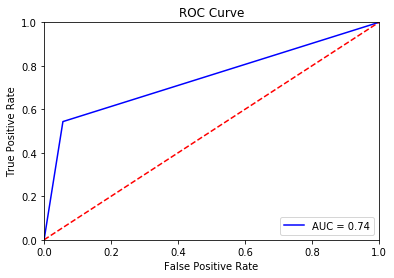

In [262]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, test_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [263]:
# check count of each class in test_set for comparision

test_set.groupby(['class']).count()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country
class,,,,,,,,,,,,,,
0,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435
1,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846


## KNNClassifier

In [264]:
knn_clf= KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train,Y)
knn_clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Evaluate KNClassifier

In [265]:

knn_clf.fit(test_x, y_test)
knn_pred = knn_clf.predict(test_x)
kn_acc= accuracy_score(knn_pred, y_test)

cm2= confusion_matrix(y_test, knn_pred).astype(int)
kn_auroc = roc_auc_score(y_test, knn_pred)


print('accuracy:', kn_acc)
print('auroc', kn_auroc)
cm2df(cm2, labels)

accuracy: 0.8889503101775075
auroc 0.8194568385871743


,<=50K,>50K
<=50K,11828,607
>50K,1201,2645


### Auroc curve

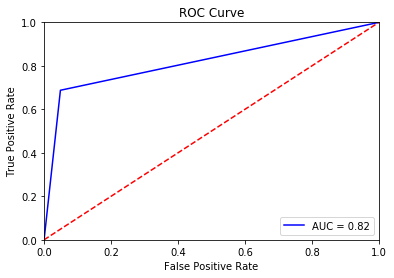

In [266]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, knn_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic Regression
    Train a logisticRegression classification model

In [267]:
model = LogisticRegression()


In [268]:

model.fit(X_train, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [269]:
train_pred = model.predict(X_train)


### Evaluate LogisticRegression Model

In [270]:
model.fit(test_x,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [271]:
# Predict class on test set
y_pred = model.predict(test_x)

In [272]:
train_accuracy = accuracy_score(Y, train_pred)

train_auroc = roc_auc_score(Y, train_pred)

print ('Train acuracy:', train_accuracy)
print( 'Train AuRoc:', train_auroc)


test_accuracy = accuracy_score(y_test, y_pred)

test_auroc = roc_auc_score(y_test, y_pred)
cm3 = confusion_matrix(y_test, y_pred).astype(int) 
print ('Test acuracy:', test_accuracy)
print( 'Test AuRoc:', test_auroc)
cm2df(cm3, labels)

Train acuracy: 0.8485257985257986
Train AuRoc: 0.7587771541283573
Test acuracy: 0.8499477919046742
Test AuRoc: 0.755850516288444


,<=50K,>50K
<=50K,11617,818
>50K,1625,2221


### AUROC curve

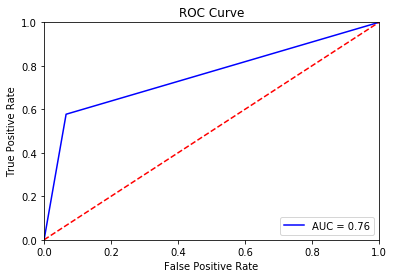

In [273]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Finetune Model via RandomizedSearch

In [274]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=3, high=12),
    }

forest_clf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(forest_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_train, Y)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb69ae22b38>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb69aa4fcf8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [276]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([2.29795216e-01, 1.38578913e-01, 1.32225840e-01, 4.17337315e-02,
       1.13472951e-01, 4.52982276e-05, 1.66010273e-02, 1.69397250e-02,
       1.69426434e-01, 1.14999299e-05, 9.41399632e-03, 1.82916636e-02,
       5.17375957e-03, 3.87989508e-03, 5.54616640e-03, 7.17467902e-03,
       1.90217177e-04, 1.18303464e-02, 4.38368015e-03, 9.58595937e-03,
       6.16363961e-03, 6.47653085e-03, 1.30416054e-02, 5.92933982e-03,
       2.09402461e-02, 7.10486764e-03, 6.04277088e-03])

# Feature Selection, Feature Importances

In [277]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [278]:
k = 5
feature_importances

array([2.29795216e-01, 1.38578913e-01, 1.32225840e-01, 4.17337315e-02,
       1.13472951e-01, 4.52982276e-05, 1.66010273e-02, 1.69397250e-02,
       1.69426434e-01, 1.14999299e-05, 9.41399632e-03, 1.82916636e-02,
       5.17375957e-03, 3.87989508e-03, 5.54616640e-03, 7.17467902e-03,
       1.90217177e-04, 1.18303464e-02, 4.38368015e-03, 9.58595937e-03,
       6.16363961e-03, 6.47653085e-03, 1.30416054e-02, 5.92933982e-03,
       2.09402461e-02, 7.10486764e-03, 6.04277088e-03])

In [279]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([0, 1, 2, 4, 8])

In [280]:
attributes = X_train.columns
np.array(attributes)[top_k_feature_indices]

array(['age', 'education_num', 'capital_gain', 'hrs_per_week',
       'marital_status_Single'], dtype=object)

In [281]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.2297952163115693, 'age'),
 (0.16942643396459076, 'marital_status_Single'),
 (0.13857891319255922, 'education_num'),
 (0.13222583976598037, 'capital_gain'),
 (0.11347295145331, 'hrs_per_week')]

In [282]:
from sklearn.feature_selection import SelectFromModel

rnd_clf =RandomForestClassifier(random_state=42)
rnd_clf.fit(X_train,Y)


sfm = SelectFromModel(rnd_clf, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of samples that meet this criterion:', 
      X_selected.shape[0])

Number of samples that meet this criterion: 32560


In [283]:
labels= X_train.columns
importances = rnd_clf.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            labels[indices[f]], 
                            importances[indices[f]]))

 1) age                            0.271038
 2) education_num                  0.137585
 3) marital_status_Single          0.133072
 4) hrs_per_week                   0.131294
 5) capital_gain                   0.124714


These Features are selected as important features for the problem.

Top 5 features selected from RandomizedSearch matches with those of RandomForestClassifier. 

# Result

Among three tested models, logistic regression performed less accurately compared to Support Vector Machine and KNeighborsClassifier(accuracy=88%). With the calculated  Confusion matrix scores of TN, FP, TP and FN and given data structure class is most likely to be <=50K. Age, education are among the important prediction variables.
